# 株価予測

- [Pythonで将来予測｜株価データを使ってpythonで機械学習をしてみよう【データ加工、データ整形、予測モデル作成、株価データの分類予測、予測精度の確認まで】](https://www.youtube.com/watch?v=asfWaVpCyl8&t=1250s)
- [機械学習で株価予測（TA-LibとLightGBMを使った学習モデル構築）](https://nehori.com/nikki/2020/01/26/post-15231/)
- [超簡単Pythonで株価予測（LightGBM 利用）機械学習](https://note.com/10mohi6/n/n4b1196fea816)
- [超簡単Pythonで株価予測（Optuna・LightGBM 利用）ハイパーパラメータ自動最適化](https://note.com/10mohi6/n/n46d1bb0267b7)
- [年利30%超え！！！！！LightGBMを用いたトヨタ株自動売買シミュレーション](https://qiita.com/kt38k/items/3c0ee4251475b6407007)
- [lightgbm.plot_importance](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html)

In [1]:
# 分析用データのダウンロード
import datetime
import pandas_datareader as data

# 銘柄コード
MEIGARA_CODE = '9983.T'

start = datetime.date(2010, 1, 1)
end = datetime.date(2021, 12, 31)
df = data.DataReader(MEIGARA_CODE, 'yahoo', start, end)
df.to_csv('%s.csv' %MEIGARA_CODE)

In [2]:
# pandasのインポート
import pandas as pd

In [3]:
# データの読み込み
df = pd.read_csv('%s.csv' %MEIGARA_CODE)
# データフレームの表示
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,17660.0,17410.0,17660.0,17460.0,373600.0,15418.551758
1,2010-01-05,17290.0,16800.0,17210.0,16900.0,1002600.0,14924.029297
2,2010-01-06,17000.0,16730.0,16960.0,16770.0,669800.0,14809.228516
3,2010-01-07,16950.0,16400.0,16780.0,16690.0,581900.0,14738.581055
4,2010-01-08,16950.0,16190.0,16780.0,16900.0,1891700.0,14924.029297
...,...,...,...,...,...,...,...
2951,2021-12-24,68410.0,67510.0,67750.0,67540.0,224500.0,67540.000000
2952,2021-12-27,67530.0,66260.0,67480.0,66360.0,352600.0,66360.000000
2953,2021-12-28,66950.0,66100.0,66770.0,66140.0,349200.0,66140.000000
2954,2021-12-29,66580.0,65010.0,66580.0,65670.0,412000.0,65670.000000


In [4]:
# 各カラムの詳細確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Open       2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Volume     2956 non-null   float64
 6   Adj Close  2956 non-null   float64
dtypes: float64(6), object(1)
memory usage: 161.8+ KB


In [5]:
# Dateのデータ型を'datetime'型へ変更
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   High       2956 non-null   float64       
 2   Low        2956 non-null   float64       
 3   Open       2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Volume     2956 non-null   float64       
 6   Adj Close  2956 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 161.8 KB


In [6]:
# 曜日情報を追加（月曜:0, 火曜:1, 水曜:2, 木曜:3, 金曜:4, 土曜:5, 日曜:6）
df['weekday'] = df['Date'].dt.weekday
df

,Date,High,Low,Open,Close,Volume,Adj Close,weekday
0,2010-01-04,17660.0,17410.0,17660.0,17460.0,373600.0,15418.551758,0
1,2010-01-05,17290.0,16800.0,17210.0,16900.0,1002600.0,14924.029297,1
2,2010-01-06,17000.0,16730.0,16960.0,16770.0,669800.0,14809.228516,2
3,2010-01-07,16950.0,16400.0,16780.0,16690.0,581900.0,14738.581055,3
4,2010-01-08,16950.0,16190.0,16780.0,16900.0,1891700.0,14924.029297,4
...,...,...,...,...,...,...,...,...
2951,2021-12-24,68410.0,67510.0,67750.0,67540.0,224500.0,67540.000000,4
2952,2021-12-27,67530.0,66260.0,67480.0,66360.0,352600.0,66360.000000,0
2953,2021-12-28,66950.0,66100.0,66770.0,66140.0,349200.0,66140.000000,1
2954,2021-12-29,66580.0,65010.0,66580.0,65670.0,412000.0,65670.000000,2


In [7]:
# 初めの月曜日となる1965/1/4を基準に週を追加
from datetime import datetime
from datetime import timedelta
start = datetime(1965, 1, 4)
df['weeks'] = (df['Date'] - start) // timedelta(weeks=1)
df

,Date,High,Low,Open,Close,Volume,Adj Close,weekday,weeks
0,2010-01-04,17660.0,17410.0,17660.0,17460.0,373600.0,15418.551758,0,2348
1,2010-01-05,17290.0,16800.0,17210.0,16900.0,1002600.0,14924.029297,1,2348
2,2010-01-06,17000.0,16730.0,16960.0,16770.0,669800.0,14809.228516,2,2348
3,2010-01-07,16950.0,16400.0,16780.0,16690.0,581900.0,14738.581055,3,2348
4,2010-01-08,16950.0,16190.0,16780.0,16900.0,1891700.0,14924.029297,4,2348
...,...,...,...,...,...,...,...,...,...
2951,2021-12-24,68410.0,67510.0,67750.0,67540.0,224500.0,67540.000000,4,2972
2952,2021-12-27,67530.0,66260.0,67480.0,66360.0,352600.0,66360.000000,0,2973
2953,2021-12-28,66950.0,66100.0,66770.0,66140.0,349200.0,66140.000000,1,2973
2954,2021-12-29,66580.0,65010.0,66580.0,65670.0,412000.0,65670.000000,2,2973


In [8]:
# カラムの並び替え
df = df[['Date', 'weeks', 'weekday', 'High', 'Low', 'Open', 'Close', 'Volume']]
df

,Date,weeks,weekday,High,Low,Open,Close,Volume
0,2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0
1,2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0
2,2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0
3,2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0
4,2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0
...,...,...,...,...,...,...,...,...
2951,2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0
2952,2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0
2953,2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0
2954,2021-12-29,2973,2,66580.0,65010.0,66580.0,65670.0,412000.0


In [9]:
# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

# データの並び替え
df.sort_values(by='Date', ascending=True, inplace=True)

<ipython-input-9-762f61eefcf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Date', ascending=True, inplace=True)


In [10]:
# 翌日の終値と本日の終値の差分を追加する
#df['delta_Close'] = df_shift['Close'] - df['Close']
df['delta_Close'] = df.Close.diff()
# 3日後の終値と本日の終値の差分を追加する
#df['delta_Close'] = df.Close.diff(3)
df

<ipython-input-10-84338e19e547>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_Close'] = df.Close.diff()


,weeks,weekday,High,Low,Open,Close,Volume,delta_Close
Date,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0
...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0


In [11]:
# 目的変数Upを追加する（翌日の始値が上がる場合1、それ以外は0とする）
df['Up'] = 0
#df['Up'][df['delta_Close'] > 0] = 1
df['Up'] = df['delta_Close'].apply(lambda x: 1 if x > 0 else 0).shift(-1)
# 目的変数の算出に用いた列を削除する
#df = df.drop('delta_Close', axis=1)
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up
Date,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0


# データの全体像をつかむ

<AxesSubplot:xlabel='Date'>

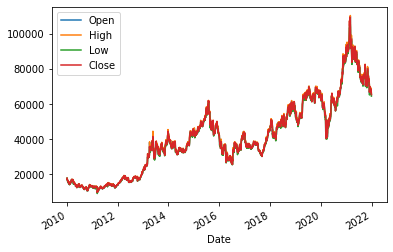

In [12]:
# 'Open', 'High', 'Low', 'Close'グラフ化のためにカラム抽出
df_new = df[['Open', 'High', 'Low', 'Close']]

# matplotlibのインポート
from matplotlib import pyplot as plt
%matplotlib inline

# 時系列折れ線グラフの作成
df_new.plot(kind='line')

# 特徴量を追加する

In [13]:
# 終値の前日比の追加
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio
Date,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582
...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315


In [14]:
# 始値と終値の差分を追加
df['Body'] = df['Open'] - df['Close']
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,Body
Date,,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN,200.0
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073,310.0
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692,190.0
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770,90.0
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582,-120.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677,210.0
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471,1120.0
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315,630.0


In [15]:
# 勢力指数（Force Index）を追加
df['Force_Index'] = df['Close'] * df['Volume']
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,Body,Force_Index
Date,,,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN,200.0,6.523056e+09
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073,310.0,1.694394e+10
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692,190.0,1.123255e+10
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770,90.0,9.711911e+09
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582,-120.0,3.196973e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677,210.0,1.516273e+10
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471,1120.0,2.339854e+10
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315,630.0,2.309609e+10


In [16]:
# TA-Libのインポート
import talib

# テクニカル指標
def add_technical_features(df):
    # Simple Moving Average
    close = df['Close']
    df['sma3'] = talib.SMA(close, timeperiod=3)
    df['sma5'] = talib.SMA(close, timeperiod=5)
    df['sma25'] = talib.SMA(close, timeperiod=25)
    df['sma50'] = talib.SMA(close, timeperiod=50)
    df['sma75'] = talib.SMA(close, timeperiod=75)
    df['sma100'] = talib.SMA(close, timeperiod=100)
    # Bollinger Bands
    df['upper1'], middle, df['lower1'] = talib.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=0)
    df['upper2'], middle, df['lower2'] = talib.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
    df['upper3'], middle, df['lower3'] = talib.BBANDS(close, timeperiod=25, nbdevup=3, nbdevdn=3, matype=0)
    # MACD - Moving Average Convergence/Divergence
    df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    # RSI - Relative Strength Index
    df['rsi9'] = talib.RSI(close, timeperiod=9)
    df['rsi14'] = talib.RSI(close, timeperiod=14)
    return df

In [17]:
# テクニカル指標を追加
df = add_technical_features(df)
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186


In [18]:
# 欠損値を列の1つ手前の値で埋める
df = df.fillna(method='ffill')
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186


In [19]:
# 分析用データのSave
df.to_csv('%s_wFeatures.csv' %MEIGARA_CODE)

In [20]:
# データの読み込み
df = pd.read_csv('%s_wFeatures.csv' %MEIGARA_CODE)
# データフレームの表示
df

,Date,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
0,2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2952,2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2953,2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186
2954,2021-12-29,2973,2,66580.0,65010.0,66580.0,65670.0,412000.0,-470.0,0.0,...,66385.713028,71738.573945,64601.426055,73522.860917,62817.139083,-1429.120009,-1443.714025,14.594017,33.701537,36.406185
